<a href="https://colab.research.google.com/github/mkatogui/RNotebooks/blob/master/Inferencia_en_el_modelo_de_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo de este ejercicio es estudiar la inferencia asintótica en la práctica cuando
no se asume normalidad de los errores.

    Considere el siguiente modelo:
                                              𝑦 = 𝛼 + 𝛽𝑥 + 𝑢

      Donde 𝑥 es un escalar, 𝛼 = 3, 𝛽 = 1 y 𝑥~N(2,1).

Analice como cambia la inferencia estadística si no se asume normalidad en el término de error. El benchmark de comparación 𝑢~N(0,12), siendo la varianza de los errores es igual a 12.

La consigna solicita realizar simulaciones que se basan en 2000 replicaciones, con
errores en las siguientes distribuciones.
* a) Uniforme,
* b) Beta,
* c) t-Student,,
* d) Bernoulli,
* e) Normal (Benchmark),
* f) Normal con outlier (Benchmark).

El número de observaciones por cada réplica toma los siguientes valores:

* 1) n=10,
* 2) n=20,
* 3) n=100,
* 4) n=200,
* 5) n=500,
* 6) n=1.000
* 7) n=5.000,
* 8) n=10.000.

Además, por cada distribución y tamaño de muestra, se solicita realizar test de
hipótesis para así calcular la cantidad de betas que rechazados con Alpha=0.05. Mostrar
como evoluciona el tamaño de test a medida que aumenta n.
Al final, se pide comparar como difieren la velocidad de convergencia en cada caso
y con respecto a tener errores normales.

### Inferencia en el modelo de regresión lineal
####Generación de variables

In [ ]:

semilla=2001 # Establecemos semilla para la generación de errores.
semilla.x=1 # Para evitar inconvenientes, se genera semilla para las x.

N = 2000 # Establecemos cantidad de repeticiones que se realizar?n.

# Establecemos el tamaño que va de 10 a 10.000 observaciones.
n=c(10,20,100,200,500, 1000, 5000, 10000)
unos = matrix(1, nrow=2000, ncol = 1) # Genero vector de 1 que luego utilizo para centrar los betas obtenidos de las regresiones y hacer el test de Hipótesis.

######### Generamos variables x ###############################
# Generamos la variable "x" que tiene distribución normal con media 2 y varianza 1
# Tiene semilla.x (1) por la cuesti?n de que surgen inconvenientes en la regresi?n
# con errores normales normal.
x=NULL
e.beta=NULL
e.unif=NULL
e.t=NULL
e.bern=NULL
e.benchmark=NULL
e.norm.out=NULL
for (i in n){
  set.seed(semilla.x);
  x[[paste("x",sep="",i)]] = matrix(rnorm(i*N,2,1), ncol = i, nrow = N); #corregido
  ######### Generamos los errores errores ###############################
  e.beta[[paste("e.beta",sep=" ",i)]] = matrix((rbeta(i*N,2,5)-(2/7))*sqrt(2352/5), ncol = i, nrow = N); # 1 # a) # Generamos los errores con distribuci?n uniformes que tienen varianza 12
  e.unif[[paste("e.unif",sep=" ",i)]] = matrix(rnorm(i*N,-6,6), ncol = i, nrow = N);
  e.t[[paste("e.t",sep=" ",i)]] = matrix(rt(i*N,2.1818), ncol = i, nrow = N);
  e.bern[[paste("e.bernoulli",sep=" ",i)]]  = matrix((rbinom(i*N,1,prob=0.8)-0.8)*sqrt(75), ncol = i, nrow = N);
  e.benchmark[[paste("e.benchmark",sep=" ",i)]] = matrix(rnorm(i*N, mean = 0,sd = sqrt(12)), ncol = i, nrow = N);
  e.norm.out[[paste("e.norm.outlier",sep=" ",i)]] = matrix(rnorm(i*N,0,sqrt(12)), ncol = i, nrow = N)
}
for (j in 1:length(n)){
    e.norm.out[[j]][,1]=500 #incluimos el outlier
}

Se generan las 'y' para cada diferente tamaño de muestras.

In [ ]:
y.unif=NULL # variable
y.beta=NULL
y.t=NULL
y.bern=NULL
y.benchmark=NULL
y.norm.out=NULL
for (i in 1:length(x)){
  y.unif[[paste("y.unif",n[i])]]=3+1*x[[i]]+e.unif[[i]];
  y.beta[[paste("y.beta",n[i])]]=3+1*x[[i]]+e.beta[[i]];
  y.t[[paste("y.t",n[i])]]=3+1*x[[i]]+e.t[[i]];
  y.bern[[paste("y.bernoulli",n[i])]]=3+1*x[[i]]+e.bern[[i]];
  y.benchmark[[paste("y.benchmark",n[i])]]=3+1*x[[i]]+e.benchmark[[i]];
  y.norm.out[[paste("y.norm.outlier",n[i])]]=3+1*x[[i]]+e.norm.out[[i]]
}

In [ ]:
# Realizamos la regresión por cada muestra utilizando las 'y' generadas junto a las 'x'.
# Luego extraemos los coeficientes para cada muestra
b.unif=NULL
b.beta=NULL
b.t=NULL
b.bern=NULL
b.benchmark=NULL
b.norm.out=NULL
for (i in 1:length(n)){
  for (j in 1:N){
    b.unif=append(b.unif,lm(y.unif[[i]][j,]~x[[i]][j,])$coeff[2]);
    b.beta=append(b.beta,lm(y.beta[[i]][j,]~x[[i]][j,])$coeff[2]);
    b.t=append(b.t,lm(y.t[[i]][j,]~x[[i]][j,])$coeff[2]);
    b.bern=append(b.bern,lm(y.bern[[i]][j,]~x[[i]][j,])$coeff[2]);
    b.benchmark=append(b.benchmark,lm(y.benchmark[[i]][j,]~x[[i]][j,])$coeff[2]);
    b.norm.out=append(b.norm.out,lm(y.norm.out[[i]][j,]~x[[i]][j,])$coeff[2]) ### acá es donde se genera el problema.
  }
}
beta.unif=t(matrix(b.unif, nrow=N))
beta.beta=t(matrix(b.beta, nrow=N))
beta.t=t(matrix(b.t, nrow=N))
beta.bern=t(matrix(b.bern, nrow=N))
beta.benchmark=t(matrix(b.benchmark, nrow=N))
beta.norm.out=t(matrix(b.norm.out, nrow=N))

In [ ]:
#Estad?sticas de los coeficientes beta en distintos tama?os de observaciones por muestra
Stats_uniform=NULL
Stats_beta=NULL
Stats_t=NULL
Stats_bern=NULL
Stats_benchmark=NULL
Stats_norm.out=NULL
for (i in 1:nrow(beta.unif)){
  a=c(summary(beta.unif[i,]),SD=sd(beta.unif[i,]));Stats_uniform=rbind(Stats_uniform,a);rownames(Stats_uniform)[i]= c(paste("n",sep="",n[i]));
  b=c(summary(beta.beta[i,]),SD=sd(beta.beta[i,]));Stats_beta=rbind(Stats_beta,a);rownames(Stats_beta)[i]= c(paste("n",sep="",n[i]));
  c=c(summary(beta.t[i,]),SD=sd(beta.t[i,]));Stats_t=rbind(Stats_t,a);rownames(Stats_t)[i]= c(paste("n",sep="",n[i]));
  d=c(summary(beta.bern[i,]),SD=sd(beta.bern[i,]));Stats_bern=rbind(Stats_bern,a);rownames(Stats_bern)[i]= c(paste("n",sep="",n[i]));
  e=c(summary(beta.benchmark[i,]),SD=sd(beta.benchmark[i,]));Stats_benchmark=rbind(Stats_benchmark,a);rownames(Stats_benchmark)[i]= c(paste("n",sep="",n[i]));
  f=c(summary(beta.norm.out[i,]),SD=sd(beta.norm.out[i,]));Stats_norm.out=rbind(Stats_norm.out,a);rownames(Stats_norm.out)[i]= c(paste("n",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


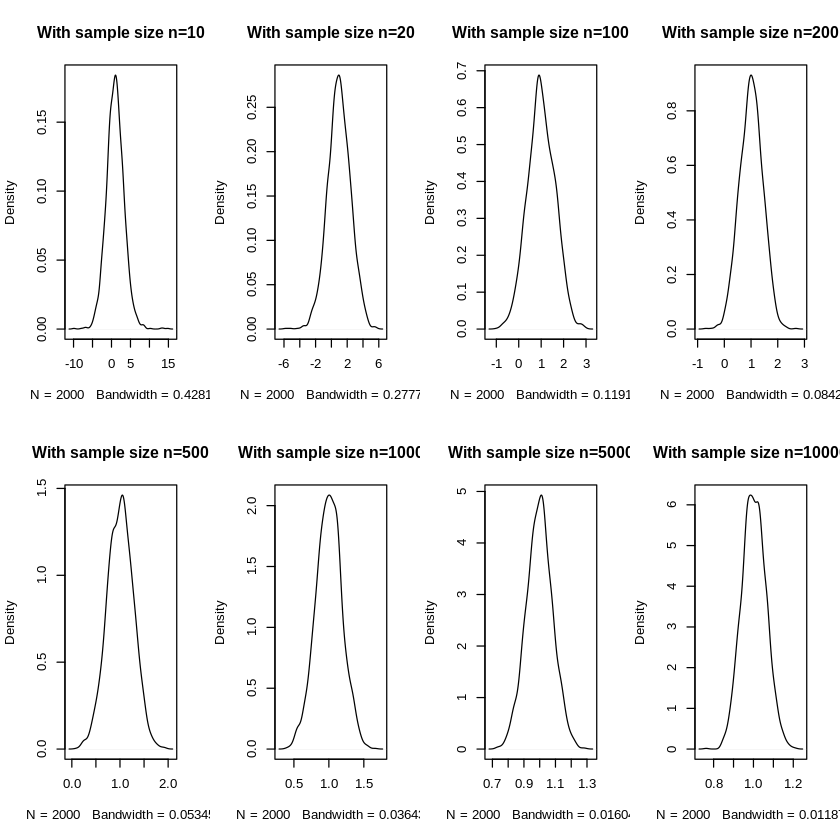

In [ ]:
# utilizaremos en el test de hip?tesis.
Stats_uniform
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.unif)) {
  plot(density(beta.unif[i,]), main=paste("With sample size n=",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


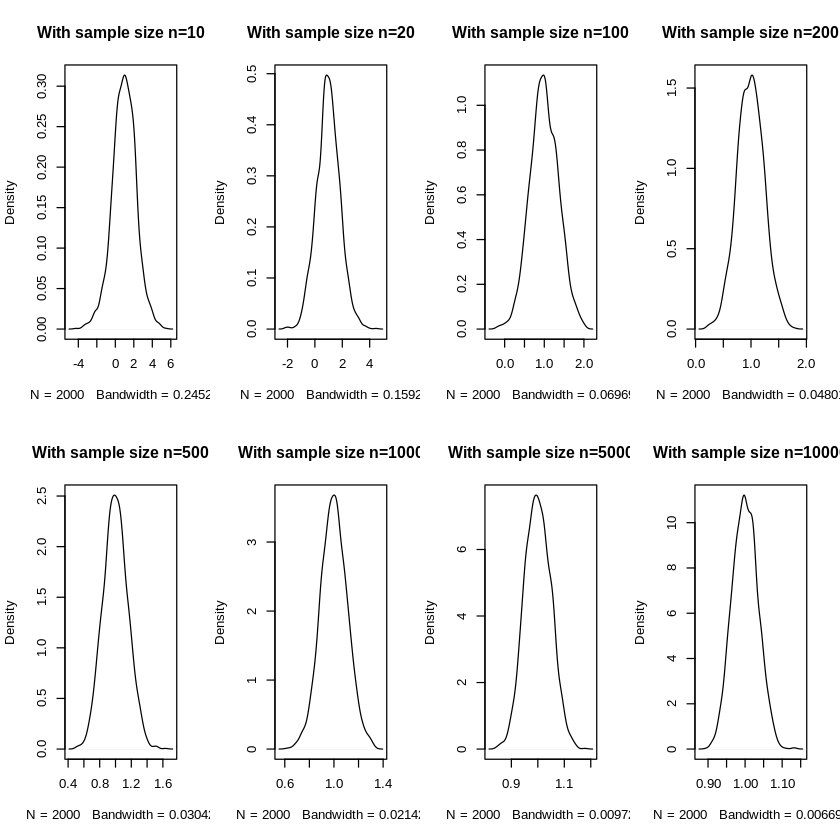

In [ ]:
Stats_beta
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.beta)) {
  plot(density(beta.beta[i,]), main=paste("With sample size n=",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


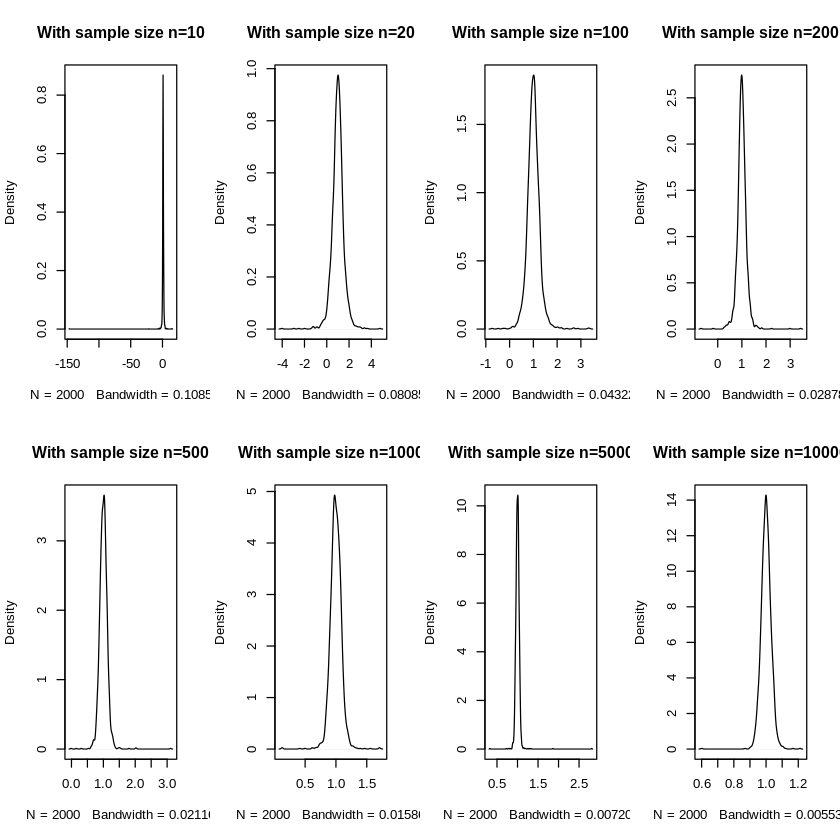

In [ ]:
Stats_t
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.t)) {
  plot(density(beta.t[i,]), main=paste("With sample size n=",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


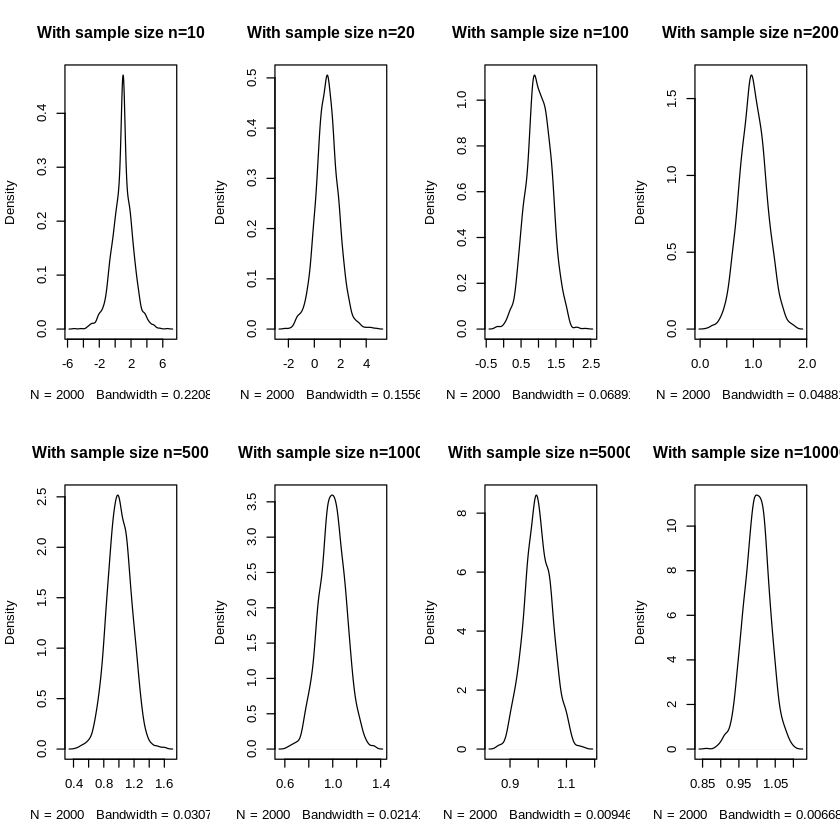

In [ ]:
Stats_bern
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.bern)) {
  plot(density(beta.bern[i,]), main=paste("With sample size n=",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


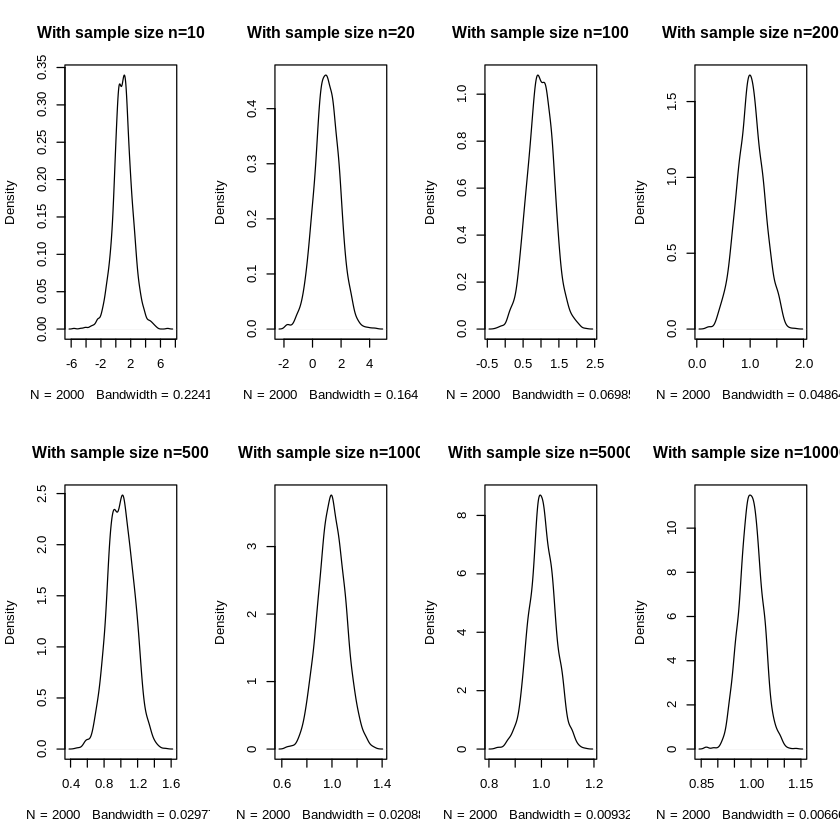

In [ ]:
Stats_benchmark
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.benchmark)) {
  plot(density(beta.benchmark[i,]), main=paste("With sample size n=",sep="",n[i]))
}

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,SD
n10,-9.8921175,-0.48958606,0.9496117,0.9814837,2.424955,14.819298,2.32876977
n20,-5.7876318,0.04903079,0.9727206,0.9675860,1.939879,5.648118,1.44346648
n100,-0.9645688,0.59143396,0.9834888,1.0050884,1.437332,2.935533,0.60509323
n200,-0.6924573,0.70747933,1.0108115,1.0035376,1.292602,2.677765,0.42784175
n500,0.1031985,0.82300755,1.0088368,1.0053847,1.188846,1.932279,0.27156948
n1000,0.3972339,0.87460066,0.9997383,0.9991266,1.122613,1.659166,0.18672451
n5000,0.7270982,0.94311717,0.9990067,0.9980357,1.052351,1.287442,0.08353833
n10000,0.7627220,0.96132543,1.0011133,1.0023423,1.042272,1.211140,0.06031577


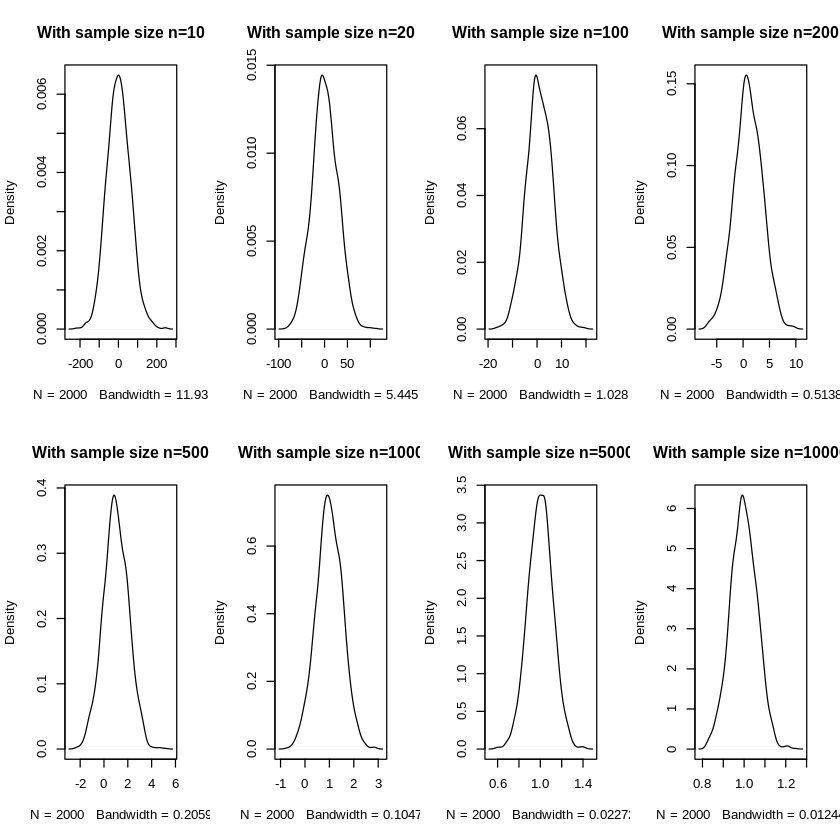

In [ ]:
Stats_norm.out
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:nrow(beta.norm.out)) {
  plot(density(beta.norm.out[i,]), main=paste("With sample size n=",sep="",n[i]))
}

In [ ]:
rechazos_unif=NULL
rechazos_beta=NULL
rechazos_t=NULL
rechazos_bern=NULL
rechazos_benchmark=NULL
rechazos_norm.out=NULL
for (i in 1:nrow(beta.unif)){
  for (j in 1:ncol(beta.unif)){
  desvio.unif=sd(beta.unif[i,]);desvio.beta=sd(beta.unif[i,]);  desvio.t=sd(beta.unif[i,]);  desvio.bern=sd(beta.unif[i,]);  desvio.normal=sd(beta.unif[i,]);desvio.unif=sd(beta.unif[i,]);
  rechazos_unif = append(rechazos_unif, (beta.unif[i,j]-1)/desvio.unif)
  }
}
rechazos=(matrix(rechazos_unif,nrow=N))

 num [1:8, 1:2000] -1.826 0.755 2.021 0.425 0.993 ...


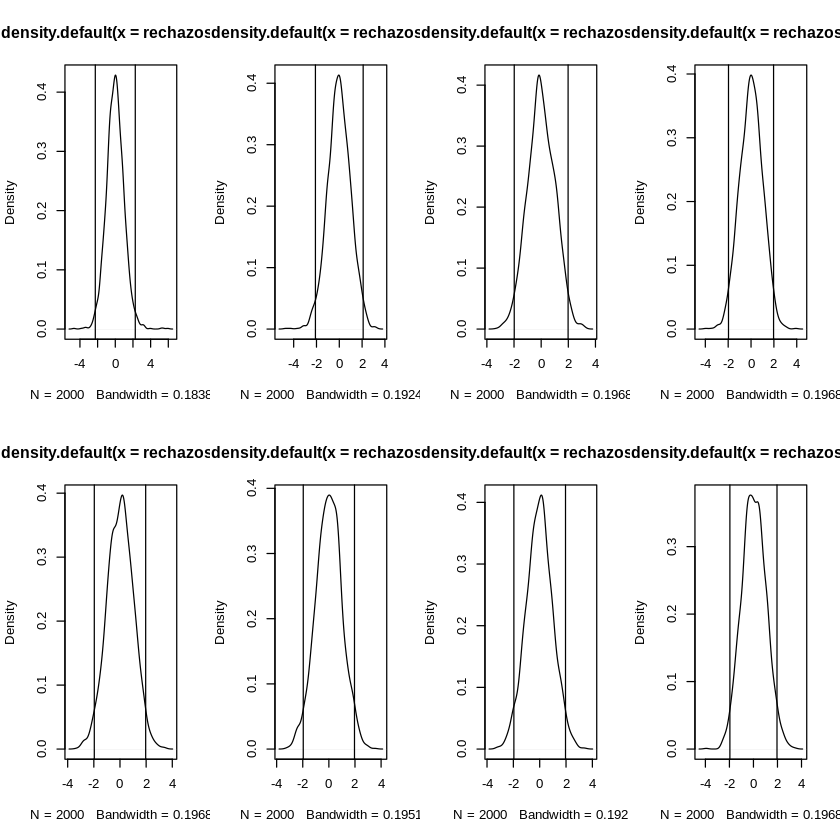

In [ ]:
par(mfrow=c(2,4)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
for (i in 1:ncol(rechazos)) {
  plot(density(rechazos[,i]))+abline(v=-qt(0.975,n[i]-1))+abline(v=qt(0.975,n[i]-1))
}


In [ ]:
# Contamos la cantidad de rechazos
a_r_1=NULL
for (i in 1:ncol(rechazos)){
    a_r_1=rbind(a_r_1,sum(rechazos[,i]<(-qt(0.975,n[i]-1)) | rechazos[,i] >qt(0.975,n[i]-1))/N);
    colnames(a_r_1)="Proporción de betas != beta poblacional con alpha=0.05";
    rownames(a_r_1)[i]=paste("n=",sep="",n[i])
}

In [ ]:
a_r_1

,Proporción de betas != beta poblacional con alpha=0.05
n=10,0.0275
n=20,0.0380
n=100,0.0475
n=200,0.0450
n=500,0.0555
n=1000,0.0535
n=5000,0.0500
n=10000,0.0470
